In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from dotenv import load_dotenv
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.fundamentaldata import FundamentalData
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from pprint import pprint
import pickle

In [4]:
import os
load_dotenv('ts/keys.env')
alpha = os.environ.get('alpha')

In [5]:
ts = TimeSeries(key=alpha, output_format='pandas')

In [6]:
from tqdm import tqdm
import time

def get_data(symbols):
    stocks = {}
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        data, metadata = ts.get_daily_adjusted(symbol=symbol, outputsize='full')
        stocks[symbol] = {
                                'data': data,
                                'meta': metadata
                                }

        
    return stocks

In [10]:
# stocks_strong = ['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME']
# ss =  get_data(stocks_strong)
# pickle.dump(ss, open('strong.pickle', 'wb'))

In [11]:
# stocks_poor = ['CCL', 'MRO', 'UAL', 'SLB', 'OKE', 'FARM', 'GLBS']
# sp = get_data(stocks_poor)
# pickle.dump(sp, open('poor.pickle', 'wb'))

100%|██████████| 7/7 [01:10<00:00, 10.08s/it]


In [12]:
ss = pickle.load(open('strong.pickle', 'rb'))
sp = pickle.load(open('poor.pickle', 'rb'))

In [29]:
def get_adjclose(stocks):
    close_price = []
    for k, v in ss.items():
        data = ss[k]['data']['5. adjusted close'].to_frame()
        data.columns = ['close']
        close_price.append((k, data))
    return close_price

In [30]:
s_close = get_adjclose(ss)
p_close = get_adjclose(sp)

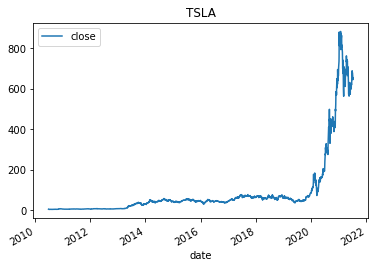

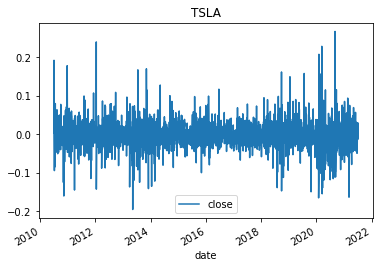

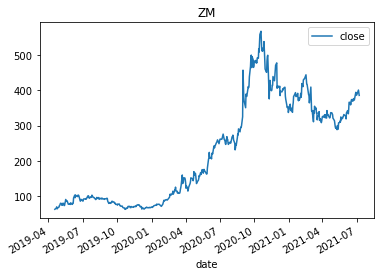

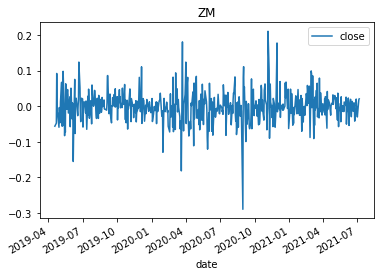

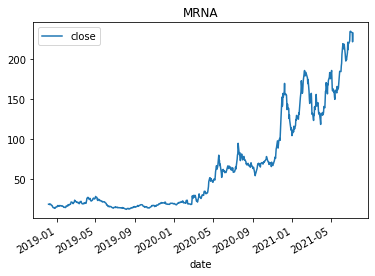

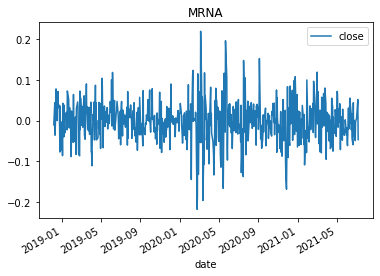

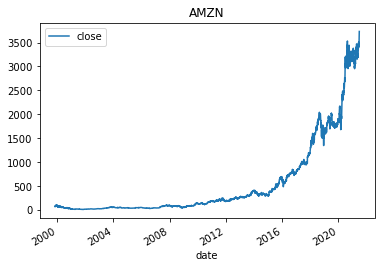

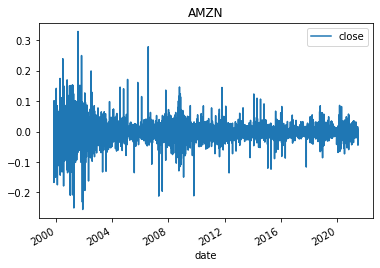

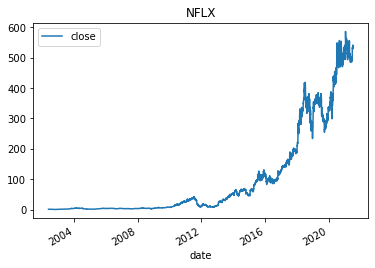

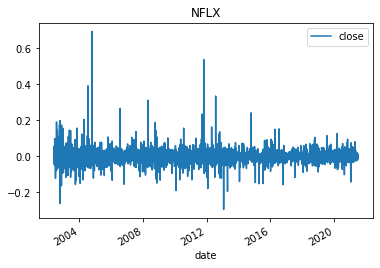

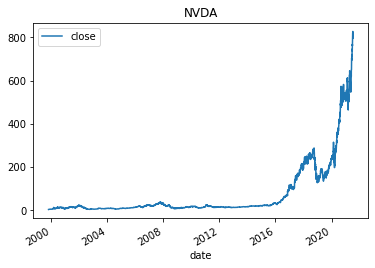

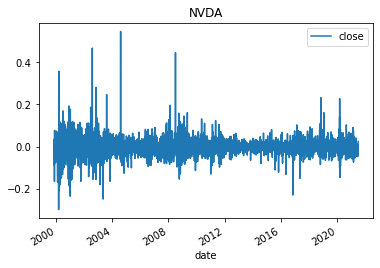

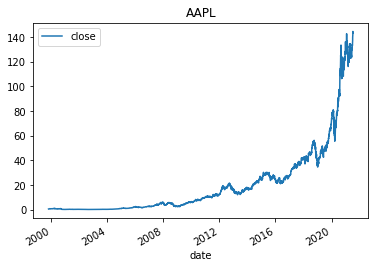

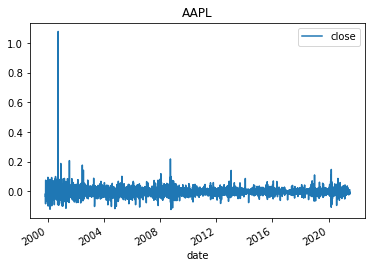

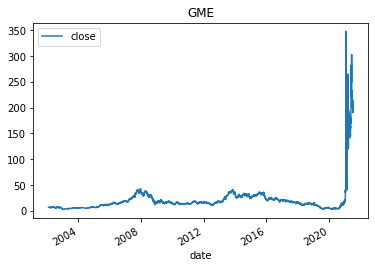

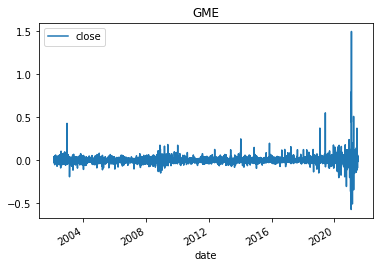

In [37]:
for k,v in s_close:
    v.plot(title=k)
    v.pct_change().plot(title=k)

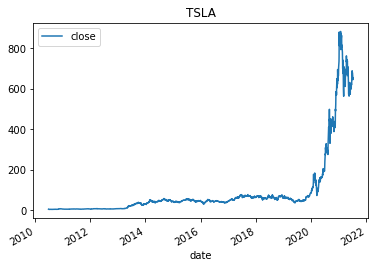

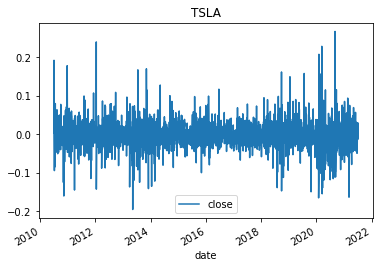

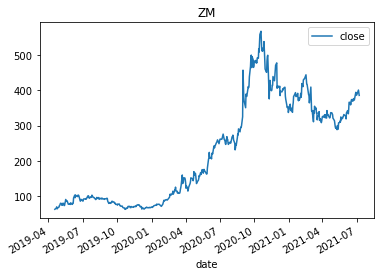

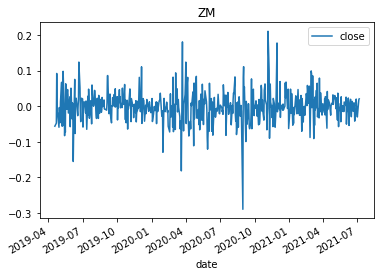

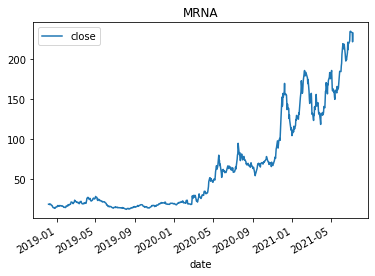

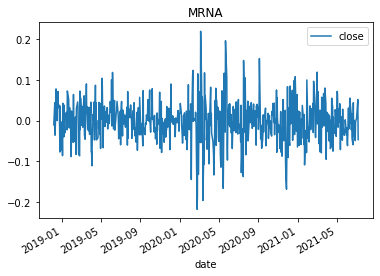

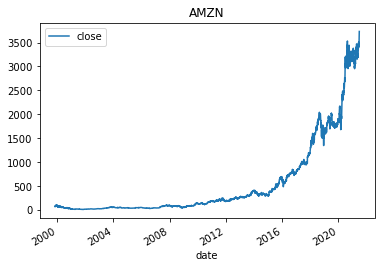

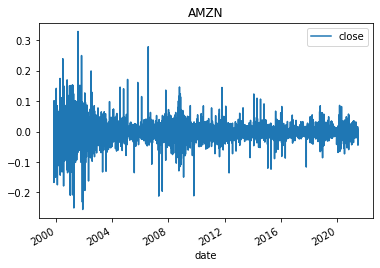

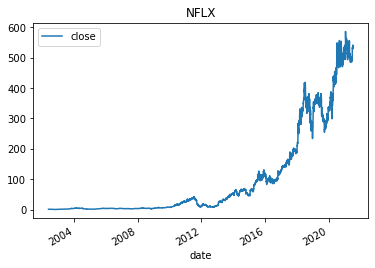

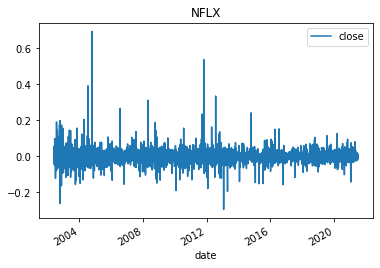

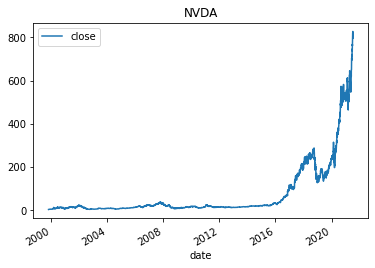

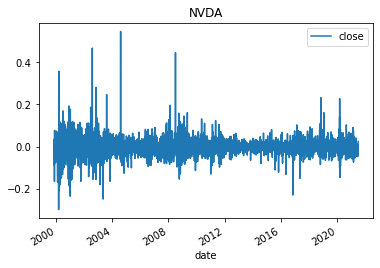

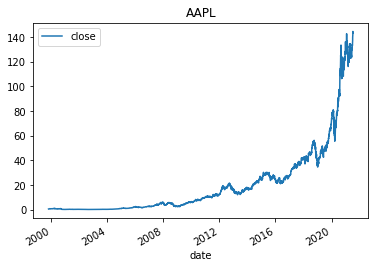

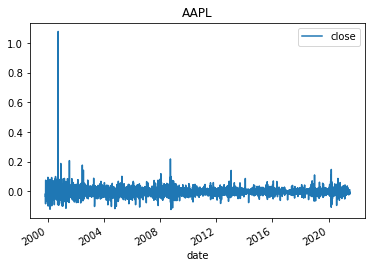

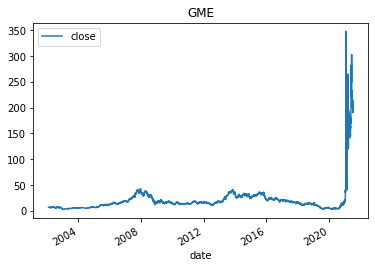

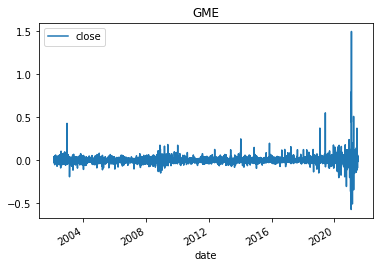

In [38]:
for k,v in p_close:
    v.plot(title=k)
    v.pct_change().plot(title=k)